# Firstly import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Storing data in a dataframe

In [4]:
df1=pd.read_csv(r'C:\Users\prashant.priyadarshi\Downloads\Databases\Google Play Store by Kaggle\googleplaystore.csv')
df1.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df1.shape

(10841, 13)

# Rating is the only column in numerical form

In [6]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


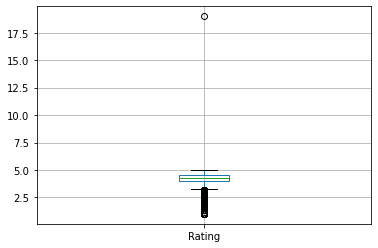

In [7]:
df1.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BA69FC700>]],
      dtype=object)

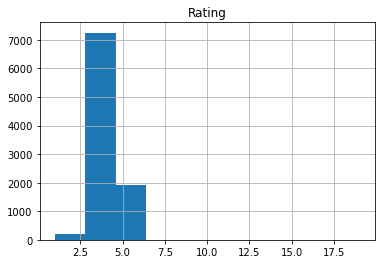

In [8]:
df1.hist()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
 df1.isnull().sum()
# count the number of missing NaN values in the dataset

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
df1[df1.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# dropping the above row

In [12]:
df2=df1.copy()
df2.drop([10472],inplace=True)
df2[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


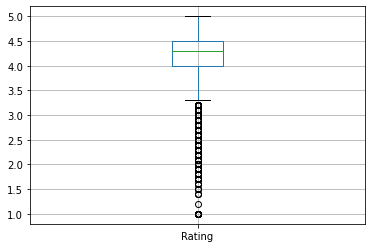

In [13]:
df2.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BA6B09EE0>]],
      dtype=object)

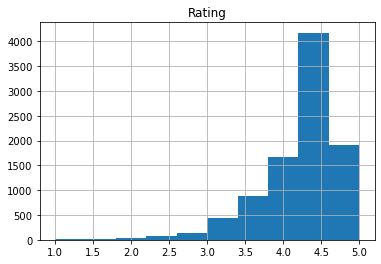

In [14]:
# most of the Rating data is concentrated between 4 and 4.5
df2.hist()

In [15]:
df2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
df2.Rating.fillna(df2.Rating.median(),inplace=True)
df2.isnull().sum()
# All the missing values of the above dataset for Rating column has been filled with the median values
# Median because the data is skewed in histogram.

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [17]:
print(df2.Type.mode())
print(df2['Current Ver'].mode())
print(df2['Android Ver'].mode())
# To check the modes for these columns

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [18]:
df2['Current Ver'].fillna(str(df2['Current Ver'].mode().values[0]),inplace=True)
df2['Type'].fillna(str(df2['Type'].mode().values[0]), inplace=True)
df2['Android Ver'].fillna(str(df2['Android Ver'].mode().values[0]),inplace=True)
df2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# All the NaN values have been filled appropriately now

In [19]:
# Convert price into numerical values now.
df3=df2.copy()
df3['Price']=df3['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x) )
df3['Price']=df3['Price'].apply(lambda x: float(x))
df3['Reviews']=pd.to_numeric(df3['Reviews'], errors='coerce')
df3.Reviews.dtype


dtype('int64')

In [20]:
df4=df3.copy()
df4.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df4['Installs']=df4['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df4['Installs']=df4['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df4['Installs']=pd.to_numeric(df4['Installs'], errors='coerce')
df4.Installs.dtype

In [ ]:
df4.Installs.unique()

# Central limit theorem can now be applied to four columns now i.e Rating, Reviews, Installs, Price

In [21]:
df4.describe()

,Rating,Reviews,Price
count,10840.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.027368
std,0.480342,2.927761e+06,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,0.000000
50%,4.300000,2.094000e+03,0.000000
75%,4.500000,5.477550e+04,0.000000
max,5.000000,7.815831e+07,400.000000


In [22]:
grp= df4.groupby('Category')
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

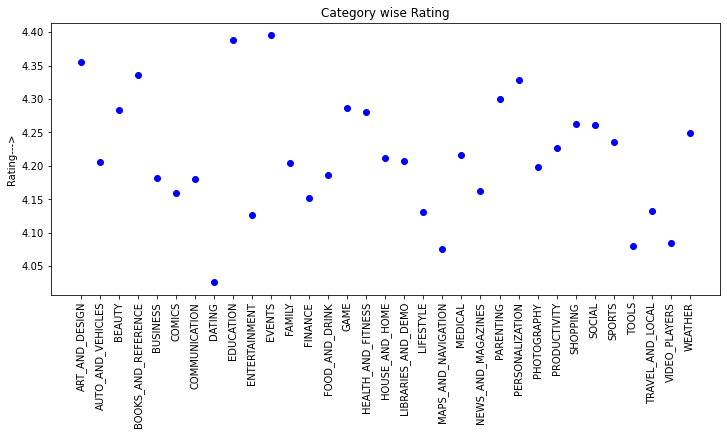

In [28]:
plt.figure(figsize=[12,5])
plt.plot(x,'ro', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.ylabel('Rating--->')
plt.show()

In [ ]:
# The highest rating above has been givent Events, Education and Aart and design and lowest rating to Dating, Maps and Navigation and Tools


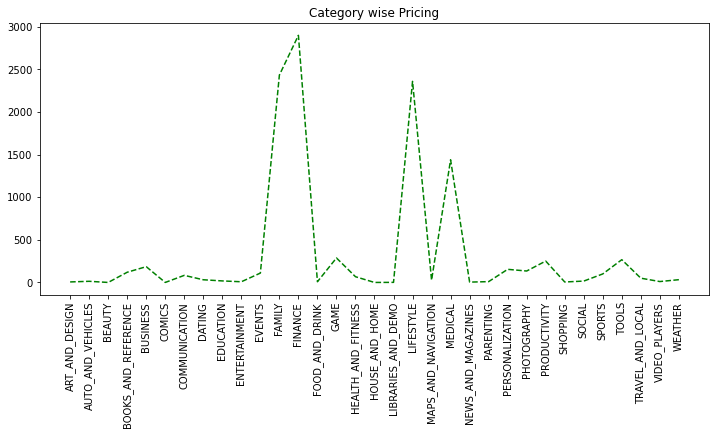

In [29]:
plt.figure(figsize=[12,5])
plt.plot(y,'r--', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.show()

In [ ]:
# Family, finance, Lifestyle and medical are the categories where people pay the most. 

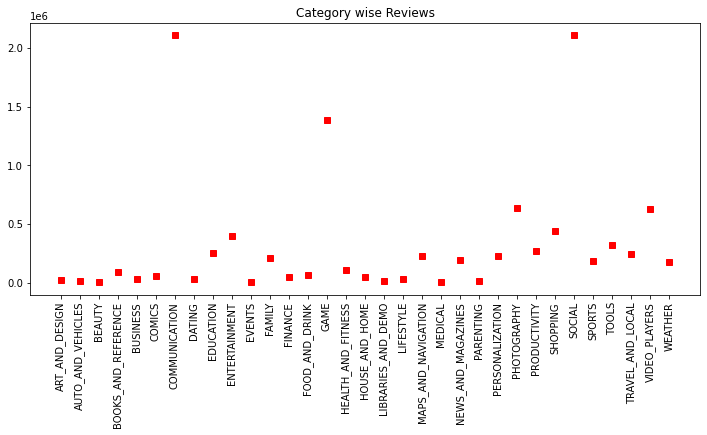

In [31]:
plt.figure(figsize=[12,5])
plt.plot(z,'bs', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.show()

In [ ]:
# Communication, Games, Social categories received the best reviews among all the categories